## Generic genes community detection analysis

In [1]:
import os

import numpy as np
import pandas as pd
import graph_tool.all as gt
import matplotlib.pyplot as plt

In [2]:
# relevant file paths
data_dir = './data'
unprocessed_edge_list = os.path.join(data_dir, 'edgeList.csv')
processed_edge_list = os.path.join(data_dir, 'edge_list_processed.csv')

In [3]:
# this is easier to load into graph-tool if we trim to the relevant columns first
if not os.path.isfile(processed_edge_list):
    edgelist_df = pd.read_csv(unprocessed_edge_list, index_col=0)
    edgelist_df.to_csv(processed_edge_list, columns=['from', 'to', 'weight'], index=False)

edgelist_df = pd.read_csv(processed_edge_list)
edgelist_df.head()

,from,to,weight
0,PA0001,PA0002,0.578872
1,PA0001,PA0548,0.510323
2,PA0001,PA0963,0.561494
3,PA0001,PA3637,0.512365
4,PA0001,PA5554,0.554768


In [4]:
G = gt.load_graph_from_csv(processed_edge_list,
                           skip_first=True,
                           directed=False,
                           hashed=True,
                           eprop_names=['weight'],
                           eprop_types=['float'])
print(G)
print(list(G.vp.keys()))
print(list(G.ep.keys()))

<Graph object, undirected, with 3477 vertices and 31556 edges, 1 internal vertex property, 1 internal edge property, at 0x7f74361e5a00>
['name']
['weight']


In [5]:
for s, t, w in G.iter_edges([G.ep['weight']]):
    print(G.vp['name'][s], G.vp['name'][t], w)
    if s > 0: break

PA0001 PA0002 0.578871792667748
PA0001 PA0548 0.510322953238081
PA0001 PA0963 0.561494130101994
PA0001 PA3637 0.512364523924246
PA0001 PA5554 0.554767556277657
PA0001 PA5556 0.510077492096518
PA0001 PA5557 0.560133539838743
PA0001 PA5560 0.577121244257997
PA0002 PA0004 0.550410666782419


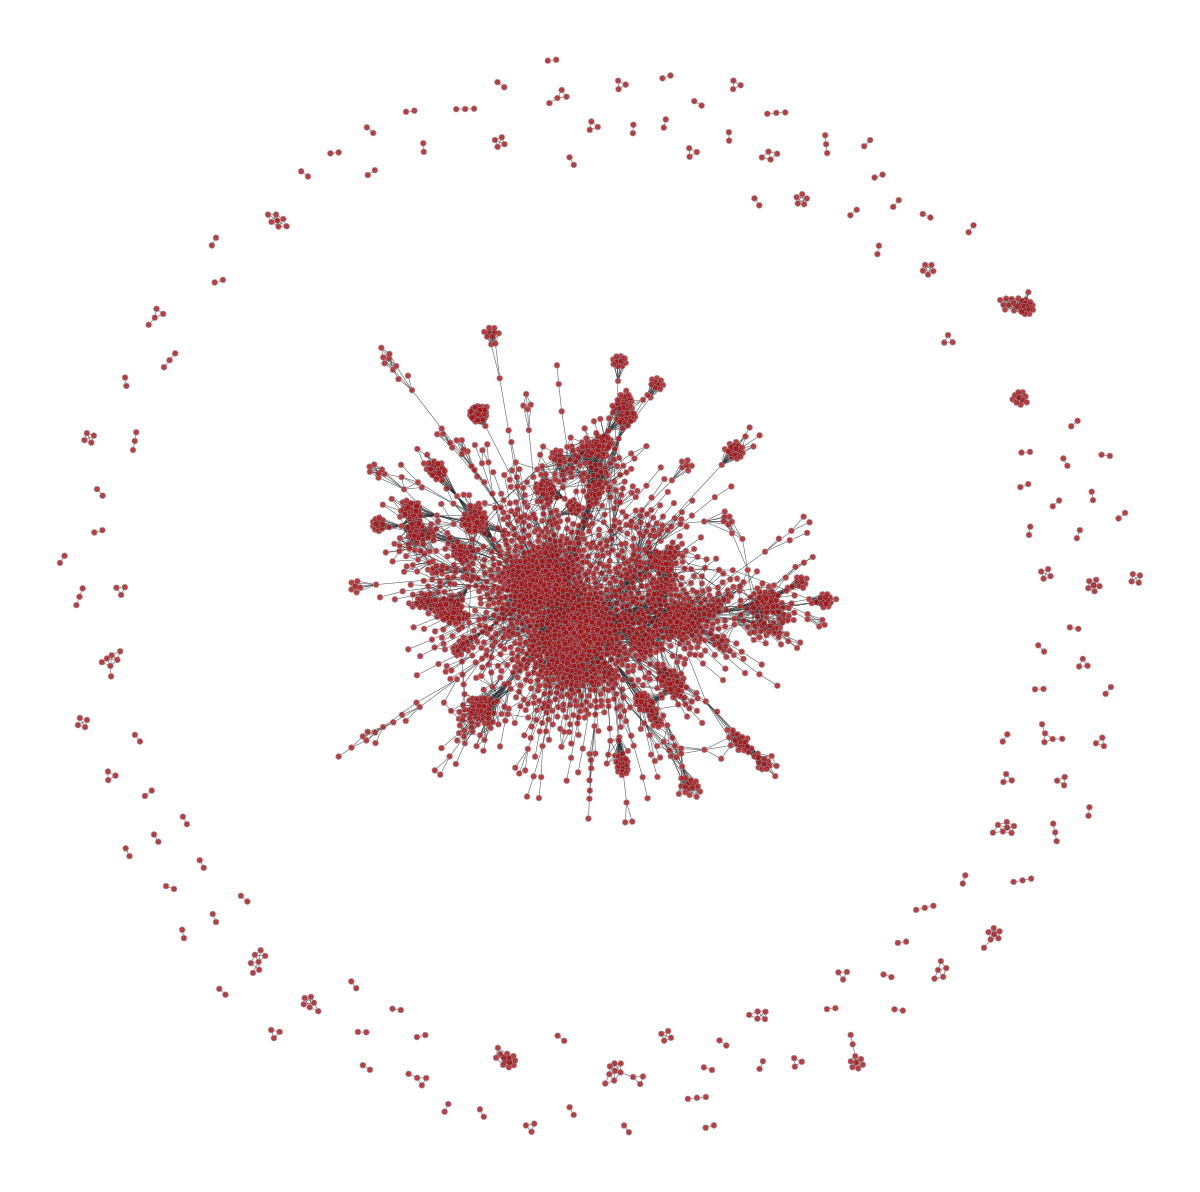

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f74361e5a00, at 0x7f74362d3e80>

In [6]:
gt.graph_draw(G)